In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [23]:
N=4
Emax= 2
dm2= 2
th= .5*np.arcsin(.8)

#initial conditions matrix
ym0= np.zeros((N,4))
for i in range(len(ym0)):
    ym0[i,:]= [1,0,0,1]

    

#paramaters array
p= np.zeros(N+2)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)

print(p)

[0.5        1.         1.5        2.         0.46364761 2.        ]


In [24]:
#generalizing f
def f(x,y,p):     
    ym= matrix_maker(y)
    
    derm= np.zeros(ym.shape)
    for i in range(derm.shape[0]):
        derm[i,:]= der.vacuum(ym[i,:], p[0], p[-1], p[-2])
    
    return array_maker(derm)

def matrix_maker(y):
    length= len(y)
    matrix = np.zeros((length//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y[4*i+j]
    return matrix


def array_maker(M):
    length= M.shape[0]
    array = np.zeros(length*4)
    
    for i in range(M.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
            
    return array  

In [25]:
y0= array_maker(ym0)
t0= 0

print(f(t0,y0,p))

[ 0.   0.  -1.6  0.   0.   0.  -1.6  0.   0.   0.  -1.6  0.   0.   0.
 -1.6  0. ]


In [26]:
t0= 0
y0= array_maker(ym0)
t0= 0
dt0=  0.01/.8
N_step = 100               
dN = 1
t_final = 10 


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

In [27]:
def threeD(y):
    d= matrix_maker(y[0,:])
    matrix= np.zeros((y.shape[0], d.shape[0], 4))
                    
    for i in range(y.shape[0]):
        matrix[i,:,:]= matrix_maker(y[i,:])
    
    return matrix

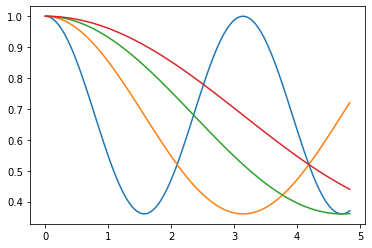

In [29]:
matrix= threeD(y)


check1= .5*matrix[:, 0, 0]*(1+matrix[:,0, 3])
check2= .5*matrix[:, 1, 0]*(1+matrix[:,1, 3])
check3= .5*matrix[:, 2, 0]*(1+matrix[:,2, 3])
check4= .5*matrix[:, 3, 0]*(1+matrix[:,3, 3])


plt.figure()
plt.plot(t, check1)
plt.plot(t, check2)
plt.plot(t, check3)
plt.plot(t, check4)
plt.show()

In [ ]:
matrix= threeD(y)
